In [47]:
from common.problem import Problem
from algorithm.idlhc import IDLHC
import pandas as pd

generations = 100
num_of_individuals = 100
num_of_variables = 200
direction = "MAX"

num_pdf = 20 
num_cut_pdf = 0.1

In [48]:
knapsack_tests_data = pd.read_csv("test_data/knapsack_new.csv",header=[0,1])

print("Ultimo valor na lista: " + list(knapsack_tests_data)[-1][1])
#print(knapsack_tests_data["values"]["1"].dropna())


values = list(knapsack_tests_data["values"][str(1)].dropna())
print(values)

Ultimo valor na lista: 9
[22.0, 28.0, 29.0, 84.0, 159.0, 135.0, 6.0, 19.0, 104.0, 147.0, 73.0, 87.0, 56.0, 59.0, 59.0, 77.0, 114.0, 149.0, 8.0, 6.0, 84.0, 132.0, 154.0, 15.0, 137.0, 42.0, 12.0, 71.0, 65.0, 75.0, 52.0, 89.0, 107.0, 101.0, 152.0, 79.0, 146.0, 158.0, 66.0, 46.0, 21.0, 159.0, 119.0, 37.0, 56.0, 150.0, 122.0, 85.0, 124.0, 145.0, 48.0, 2.0, 145.0, 60.0, 145.0, 17.0, 55.0, 88.0, 66.0, 41.0, 28.0, 12.0, 84.0, 56.0, 11.0, 109.0, 29.0, 118.0, 109.0, 46.0, 62.0, 24.0, 120.0, 62.0, 53.0, 4.0, 25.0, 39.0, 75.0, 146.0, 60.0, 15.0, 3.0, 146.0, 17.0, 38.0, 90.0, 61.0, 16.0, 121.0, 57.0, 6.0, 87.0, 155.0, 44.0, 62.0, 104.0, 18.0, 7.0, 72.0, 74.0, 34.0, 119.0, 99.0, 34.0, 64.0, 100.0, 154.0, 9.0, 52.0, 140.0, 129.0, 106.0, 19.0, 97.0, 118.0, 140.0, 58.0, 68.0, 20.0, 112.0, 19.0, 52.0, 89.0, 101.0, 87.0, 27.0, 97.0, 155.0, 75.0, 58.0, 118.0, 56.0, 100.0, 44.0, 153.0, 41.0, 30.0, 91.0, 125.0, 62.0, 16.0, 28.0, 36.0, 106.0, 76.0, 43.0, 49.0, 22.0, 93.0, 145.0, 51.0, 47.0, 15.0, 143.0, 71.0

In [49]:
from bench_algorithms import Knapsack

knapsack_tests_data = pd.read_csv("test_data/knapsack_new.csv",header=[0,1])

current_instance = 1
values = list(knapsack_tests_data["values"][str(current_instance)].dropna())
weights = list(knapsack_tests_data["weights"][str(current_instance)].dropna())
#knapsack_tests_data = pd.read_csv('test_data/knapsack.csv')

#data_row = knapsack_tests_data.iloc[0]
#values = [int(i) for i in data_row["values"].replace("[","").replace("]", "").split(",")]
#weights = [int(i) for i in data_row["weights"].replace("[","").replace("]", "").split(",")]

knapsack = Knapsack(values, weights)

problem = Problem(
    num_of_variables=num_of_variables,
    num_of_individuals=num_of_individuals,
    num_of_generations=generations,
    objective=[knapsack.bench],
    repair=[knapsack.repair],
    mutation=(1 / num_of_variables),
    variables_range=[0, 1],
    direction=direction,
    initial_population_type=0,
)

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

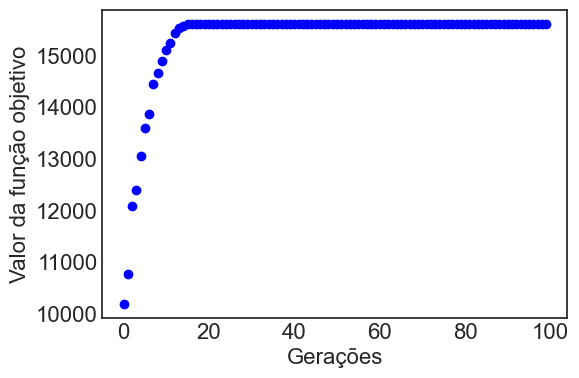

In [50]:
num_iterations = 1

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"
convergences = []

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)
    convergences.append(iteration.convergence_array)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}

